<a href="https://colab.research.google.com/github/Bhavani827/NLP/blob/main/ass_nlp_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install gensim

# Numerical operations
import numpy as np

# Loading word embeddings
from gensim.models import KeyedVectors

# Visualization
import matplotlib.pyplot as plt

# Dimensionality reduction
from sklearn.manifold import TSNE

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.9/27.9 MB 43.9 MB/s eta 0:00:00


In [5]:
# Load Google News Word2Vec model (300 dimensions) using gensim.downloader
import gensim.downloader as api
model = api.load("word2vec-google-news-300")

# Vocabulary size
print("Vocabulary size:", len(model.key_to_index))

# Display one example vector
print("Vector for word 'computer':")
print(model["computer"])

[==================================================] 100.0% 1662.8/1662.8MB downloaded
Vocabulary size: 3000000
Vector for word 'computer':
[ 1.07421875e-01 -2.01171875e-01  1.23046875e-01  2.11914062e-01
 -9.13085938e-02  2.16796875e-01 -1.31835938e-01  8.30078125e-02
  2.02148438e-01  4.78515625e-02  3.66210938e-02 -2.45361328e-02
  2.39257812e-02 -1.60156250e-01 -2.61230469e-02  9.71679688e-02
 -6.34765625e-02  1.84570312e-01  1.70898438e-01 -1.63085938e-01
 -1.09375000e-01  1.49414062e-01 -4.65393066e-04  9.61914062e-02
  1.68945312e-01  2.60925293e-03  8.93554688e-02  6.49414062e-02
  3.56445312e-02 -6.93359375e-02 -1.46484375e-01 -1.21093750e-01
 -2.27539062e-01  2.45361328e-02 -1.24511719e-01 -3.18359375e-01
 -2.20703125e-01  1.30859375e-01  3.66210938e-02 -3.63769531e-02
 -1.13281250e-01  1.95312500e-01  9.76562500e-02  1.26953125e-01
  6.59179688e-02  6.93359375e-02  1.02539062e-02  1.75781250e-01
 -1.68945312e-01  1.21307373e-03 -2.98828125e-01 -1.15234375e-01
  5.66406250e-0

In [6]:
words = [
    # Animals
    "dog", "cat", "lion", "tiger", "elephant", "horse", "cow", "monkey",

    # Technology
    "computer", "laptop", "keyboard", "mouse", "internet", "software", "hardware", "network",

    # Cities
    "Delhi", "Mumbai", "London", "Paris", "Tokyo", "Berlin", "Sydney", "NewYork",

    # Vehicles
    "car", "bus", "train", "bike", "truck", "airplane", "ship", "scooter"
]


In [7]:
vectors = np.array([model[word] for word in words])
print("Shape of vector matrix:", vectors.shape)


Shape of vector matrix: (32, 300)


In [8]:
tsne = TSNE(
    n_components=2,
    perplexity=10,
    random_state=42,
    init="random"
)

reduced_vectors = tsne.fit_transform(vectors)

print("Shape after t-SNE:", reduced_vectors.shape)


Shape after t-SNE: (32, 2)


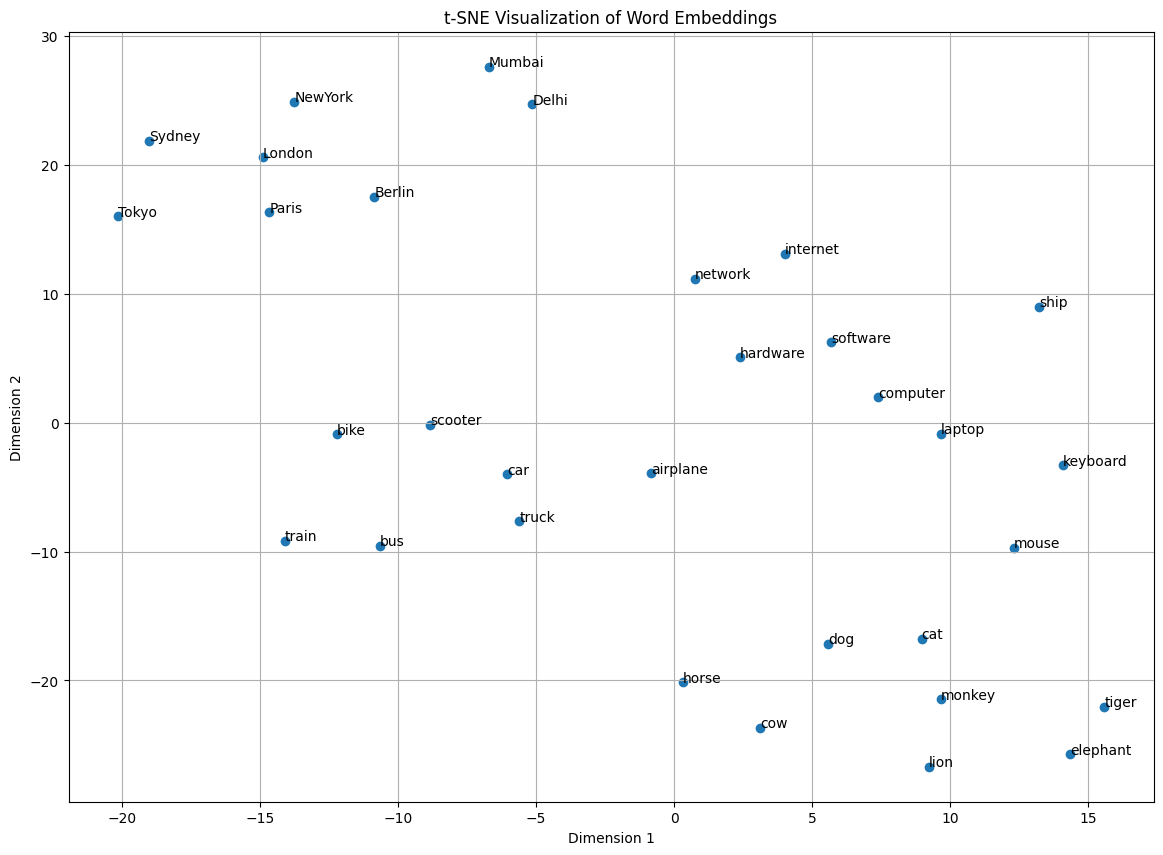

In [9]:
plt.figure(figsize=(14, 10))

x = reduced_vectors[:, 0]
y = reduced_vectors[:, 1]

plt.scatter(x, y)

# Annotate each point
for i, word in enumerate(words):
    plt.annotate(word, (x[i], y[i]))

plt.title("t-SNE Visualization of Word Embeddings")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.grid(True)
plt.show()
